In [ ]:
# 1. Install Required Libraries
!pip install -q scikit-learn pandas matplotlib seaborn xgboost tensorflow openpyxl

In [ ]:
import pandas as pd                # for reading and working with data
import numpy as np                 # for numerical operations
import matplotlib.pyplot as plt    # for data visualizations
import seaborn as sns              # for prettier visualizations
%matplotlib inline
import importlib
importlib.reload(plt)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler   # for encoding and scaling
from sklearn.model_selection import train_test_split             # for splitting data
from sklearn.ensemble import RandomForestClassifier              # for machine learning model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # for evaluation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC # Import SVC

In [ ]:
df = pd.read_excel('/content/Copy of WQuality_River-Data-2023_change(1).xlsx')

In [ ]:
df.head(2000)

,Station Code,Monitoring Location,State,T Min,T Max,DO Min,DO Max,pH Min,pH Max,Cond Min,...,BOD Min,BOD Max,NO3 Min,NO3 Max,Fc Min,Fc Max,Tc Min,Tc Max,Fs Min,Fs Max
0,1001.0,RIVER BEAS AT U/S MANALI,HIMACHAL PRADESH,2.0,24.0,7.8,9.2,7.2,8.2,68.0,...,1.0,2.8,0.32,1.15,2.0,170.0,63.0,540.0,2,2
1,2601.0,RIVER BEAS AT D/S MANALI,HIMACHAL PRADESH,2.0,13.0,7.6,9.0,6.5,8.1,58.0,...,1.0,2.8,0.32,1.87,110.0,1600.0,920.0,1600.0,2,2
2,4444.0,RIVER BEAS D/S OF WASTE PROCESSING FACILITY AT...,HIMACHAL PRADESH,2.0,13.0,7.8,8.8,6.7,7.8,62.0,...,1.0,2.8,0.32,1.08,110.0,1600.0,350.0,1600.0,2,2
3,4037.0,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,2.0,14.0,7.9,8.9,6.3,8.0,52.0,...,1.0,1.0,0.32,1.74,22.0,110.0,79.0,540.0,2,2
4,3866.0,RIVER BEAS U/S BEFORE CONF. OF MANALSU NALLAH,HIMACHAL PRADESH,2.0,13.0,7.8,9.1,7.0,7.8,51.0,...,1.0,1.0,0.32,0.97,23.0,120.0,110.0,430.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,3943.0,RIVER BUDHABALANGA AT BALASORE U/S,ODISHA,21.0,30.0,5.6,9.6,6.9,8.5,125.0,...,1.1,2.4,0.32,0.86,230.0,2300.0,1300.0,4900.0,NaN,NaN
1616,3942.0,"RIVER SONO AT KANAKDURGA ROAD NEAR REMUNA, HAT...",ODISHA,20.0,30.0,3.2,9.6,6.9,8.5,120.0,...,1.1,1.8,0.32,0.93,78.0,13000.0,490.0,35000.0,NaN,NaN
1617,2115.0,RIVER TAPTI AT NEPA NAGAR 100 METRE D/S AFTER ...,MADHYA PRADESH,20.0,22.0,6.6,7.7,7.7,8.6,202.0,...,1.0,1.8,0.57,1.42,2.0,2.0,37.0,63.0,NaN,NaN
1618,4753.0,"RIVER HARMU NEAR HARMU BRIDGE, HARMU, RANCHI",JHARKHAND,11.0,24.0,2.9,3.6,6.5,6.6,NaN,...,2.5,11.7,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Station Code,Monitoring Location,State,T Min,T Max,DO Min,DO Max,pH Min,pH Max,Cond Min,...,BOD Min,BOD Max,NO3 Min,NO3 Max,Fc Min,Fc Max,Tc Min,Tc Max,Fs Min,Fs Max
1615,3943.0,RIVER BUDHABALANGA AT BALASORE U/S,ODISHA,21.0,30.0,5.6,9.6,6.9,8.5,125.0,...,1.1,2.4,0.32,0.86,230.0,2300.0,1300.0,4900.0,NaN,NaN
1616,3942.0,"RIVER SONO AT KANAKDURGA ROAD NEAR REMUNA, HAT...",ODISHA,20.0,30.0,3.2,9.6,6.9,8.5,120.0,...,1.1,1.8,0.32,0.93,78.0,13000.0,490.0,35000.0,NaN,NaN
1617,2115.0,RIVER TAPTI AT NEPA NAGAR 100 METRE D/S AFTER ...,MADHYA PRADESH,20.0,22.0,6.6,7.7,7.7,8.6,202.0,...,1.0,1.8,0.57,1.42,2.0,2.0,37.0,63.0,NaN,NaN
1618,4753.0,"RIVER HARMU NEAR HARMU BRIDGE, HARMU, RANCHI",JHARKHAND,11.0,24.0,2.9,3.6,6.5,6.6,NaN,...,2.5,11.7,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1619,4754.0,RIVER HARMU BEFORE METTING TO SWARNREKHA RIVER,JHARKHAND,11.4,25.0,3.1,4.8,6.5,6.7,NaN,...,4.5,11.1,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Station Code         1619 non-null   float64
 1   Monitoring Location  1619 non-null   object 
 2   State                1619 non-null   object 
 3   T Min                1568 non-null   float64
 4   T Max                1584 non-null   float64
 5   DO Min               1618 non-null   float64
 6   DO Max               1618 non-null   float64
 7   pH Min               1619 non-null   float64
 8   pH Max               1619 non-null   float64
 9   Cond Min             1563 non-null   float64
 10  Cond Max             1563 non-null   float64
 11  BOD Min              1619 non-null   float64
 12  BOD Max              1619 non-null   float64
 13  NO3 Min              1619 non-null   float64
 14  NO3 Max              1619 non-null   float64
 15  Fc Min               1426 non-null   f

In [ ]:
df.describe()

,Station Code,T Min,T Max,DO Min,DO Max,pH Min,pH Max,Cond Min,Cond Max,BOD Min,BOD Max,NO3 Min,NO3 Max,Fc Min,Fc Max,Tc Min,Tc Max
count,1619.000000,1568.000000,1584.000000,1618.000000,1618.000000,1619.000000,1619.000000,1563.000000,1563.000000,1619.000000,1619.00000,1619.000000,1619.000000,1.426000e+03,1.426000e+03,1.441000e+03,1.441000e+03
mean,4542.665225,18.457334,27.700316,5.805748,7.895735,7.194330,8.081272,307.555342,1256.115803,2.316245,5.72446,0.732261,4.402520,3.989966e+03,7.079512e+04,6.707617e+03,3.674592e+05
std,5991.857128,5.577198,5.507418,1.981531,1.905374,0.590943,0.544253,938.374889,4288.982719,4.009431,13.59595,2.144732,24.527404,5.995321e+04,7.992787e+05,8.789378e+04,5.266524e+06
min,1.000000,2.000000,4.000000,0.300000,0.300000,2.000000,3.000000,5.000000,31.000000,1.000000,1.00000,0.000000,0.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
25%,1819.500000,15.000000,24.175000,5.100000,7.100000,7.000000,7.900000,127.000000,277.500000,1.000000,1.90000,0.300000,0.545000,2.000000e+00,2.700000e+01,3.400000e+01,1.700000e+02
50%,2955.000000,19.000000,29.000000,6.200000,7.900000,7.200000,8.200000,210.000000,470.000000,1.200000,2.60000,0.320000,1.360000,2.450000e+01,2.000000e+02,2.000000e+02,1.400000e+03
75%,4431.500000,22.000000,31.500000,7.000000,9.000000,7.500000,8.400000,325.500000,816.000000,2.100000,3.80000,0.600000,3.020000,3.300000e+02,2.300000e+03,1.100000e+03,4.900000e+03
max,30089.000000,29.000000,39.000000,11.400000,14.100000,9.000000,9.900000,34400.000000,54200.000000,48.000000,294.00000,32.000000,790.020000,2.200000e+06,2.400000e+07,3.200000e+06,1.600000e+08


In [ ]:
df.columns

Index(['Station Code', 'Monitoring Location', 'State', 'T Min', 'T Max',
       'DO Min', 'DO Max', 'pH Min ', 'pH Max', 'Cond Min', 'Cond Max',
       'BOD Min', 'BOD Max', 'NO3 Min', 'NO3 Max', 'Fc Min', 'Fc Max',
       'Tc Min', 'Tc Max', 'Fs Min', 'Fs Max'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Station Code,1
Monitoring Location,1
State,1
T Min,52
T Max,36
DO Min,2
DO Max,2
pH Min,1
pH Max,1
Cond Min,57


In [ ]:
drop_columns=['Fs Min', 'Fs Max']
df.drop(columns=drop_columns, axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Station Code,1
Monitoring Location,1
State,1
T Min,52
T Max,36
DO Min,2
DO Max,2
pH Min,1
pH Max,1
Cond Min,57


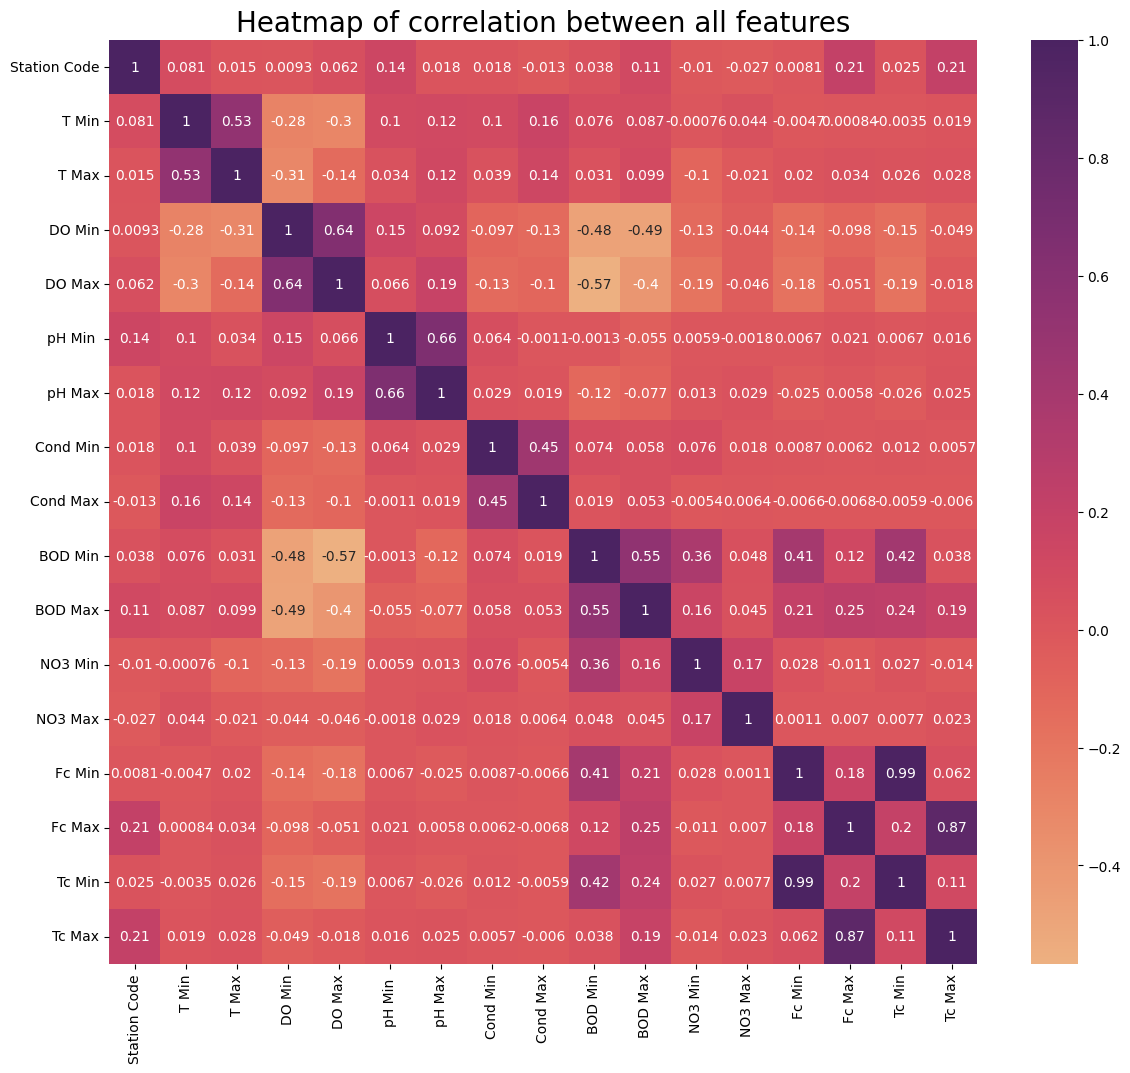

In [ ]:
#heatmap plot
plt.figure(figsize=(14,12))
plt.title("Heatmap of correlation between all features", fontsize=20)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare')
plt.show()

In [ ]:
# Suppress specific warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras')
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

In [ ]:
# 3. Load and Preprocess Data
def load_and_preprocess_data(filepath):
    try:
        df = pd.read_excel(filepath)

        # Check if columns exist before processing
        columns_to_check = ['pH Min', 'pH Max', 'T Min', 'T Max', 'DO Min', 'DO Max',
                           'BOD Min', 'BOD Max', 'NO3 Min', 'NO3 Max', 'Cond Min', 'Cond Max',
                           'Tc Min', 'Tc Max', 'Fc Min', 'Fc Max']

        # Create dictionary to map existing columns
        col_mapping = {}
        for col in columns_to_check:
            if col in df.columns:
                col_mapping[col] = col
            else:
               # Try to find similar column names (case insensitive)
                matching_cols = [c for c in df.columns if col.lower() in c.lower()]
                if matching_cols:
                    col_mapping[col] = matching_cols[0]
                else:
                    print(f"Warning: Column '{col}' not found in dataset. Will use mean values.")
                    # Add dummy columns with NaN values
                    df[col] = np.nan


        # Calculate average values for each parameter
        df['pH'] = df[[col_mapping['pH Min'], col_mapping['pH Max']]].mean(axis=1)
        df['Temp'] = df[[col_mapping['T Min'], col_mapping['T Max']]].mean(axis=1)
        df['DO'] = df[[col_mapping['DO Min'], col_mapping['DO Max']]].mean(axis=1)
        df['BOD'] = df[[col_mapping['BOD Min'], col_mapping['BOD Max']]].mean(axis=1)
        df['NO3'] = df[[col_mapping['NO3 Min'], col_mapping['NO3 Max']]].mean(axis=1)
        df['Cond'] = df[[col_mapping['Cond Min'], col_mapping['Cond Max']]].mean(axis=1)
        df['Tc'] = df[[col_mapping['Tc Min'], col_mapping['Tc Max']]].mean(axis=1)
        df['Fc'] = df[[col_mapping['Fc Min'], col_mapping['Fc Max']]].mean(axis=1)


        # Fill missing values with reasonable defaults based on drinking water standards
        # Source: WHO drinking water guidelines
        df['pH'] = df['pH'].fillna(7.0)  # Neutral pH
        df['Temp'] = df['Temp'].fillna(20.0)  # Typical room temperature
        df['DO'] = df['DO'].fillna(7.5)  # Healthy DO level
        df['BOD'] = df['BOD'].fillna(2.0)  # Moderate BOD
        df['NO3'] = df['NO3'].fillna(0.5)  # Safe nitrate level
        df['Cond'] = df['Cond'].fillna(500)  # Typical conductivity
        df['Tc'] = df['Tc'].fillna(100)  # Moderate total coliform
        df['Fc'] = df['Fc'].fillna(50)  # Moderate fecal coliform

        # Apply log transformation to 'Tc' and 'Fc' to handle extreme values
        df['Tc'] = np.log1p(df['Tc'])
        df['Fc'] = np.log1p(df['Fc'])

        return df

    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

In [ ]:
# 4. Define Water Quality Classes Based on Standards
def classify_water_quality(row):
    """
    Classify water quality based on multiple parameters:
    - Safe for Immediate Consumption: Meets strictest drinking water standards
    - Good: Suitable for drinking with conventional treatment
    - Bad: Unsuitable for drinking without extensive treatment

    Standards based on WHO, EPA, and EU drinking water guidelines
    """
    # Safe for Immediate Consumption criteria (strictest standards)
    if (6.5 <= row['pH'] <= 8.5 and
        row['DO'] >= 6.0 and
        row['BOD'] <= 1.0 and
        row['NO3'] <= 10 and  # WHO standard is 50 mg/L but we're stricter
        row['Cond'] <= 1000 and
        np.expm1(row['Tc']) <= 10 and  # Convert back from log scale
        np.expm1(row['Fc']) == 0):  # No fecal coliform allowed for immediate consumption
        return 'Safe for Immediate Consumption'

    # Good quality criteria
    elif (6.0 <= row['pH'] <= 9.0 and
          row['DO'] >= 4.0 and
          row['BOD'] <= 3.0 and
          row['NO3'] <= 50 and  # WHO standard
          row['Cond'] <= 2500 and
          np.expm1(row['Tc']) <= 1000 and  # Total coliform
          np.expm1(row['Fc']) <= 100):  # Fecal coliform
        return 'Good'

    # Bad quality (fails one or more key parameters)
    else:
        return 'Bad'

In [ ]:
# 5. Correlation Analysis
def analyze_correlations(df, target='pH'):
    """
    Analyze how pH correlates with other water quality parameters
    """
    # Select only numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=np.number)
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(22,18)) # Adjusted figure size
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Water Quality Parameters')
    plt.show()

    # Focus on target correlations, if target is in numeric_df columns
    if target in numeric_df.columns:
      pH_corr = corr_matrix[target].sort_values(ascending=False)
      print(f"\nCorrelation with {target}:\n{pH_corr}")

      # Visualize relationships with target
      for col in numeric_df.columns:
          if col != target and numeric_df[col].dtype in ['float64', 'int64']:
              plt.figure(figsize=(8, 4))
              sns.scatterplot(x=numeric_df[target], y=numeric_df[col])
              plt.title(f'{target} vs {col}')
              plt.xlabel(target)
              plt.ylabel(col)
              plt.show()
    else:
        print(f"Warning: Target column '{target}' not found in numeric data for correlation analysis.")

In [ ]:
# 6. Model Training and Evaluation
def train_and_evaluate_models(X, y):
    """
    Train and evaluate the Random Forest model.
    """
    # Encode target labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize model
    model = RandomForestClassifier()

    # Train and evaluate the model
    print("\n=== Training Random Forest ===")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Store results
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    results = {
        'Random Forest': {
            'accuracy': accuracy,
            'report': report,
            'model': model,
            'predictions': y_pred
        }
    }

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title('Random Forest Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return results, le, scaler


Water Quality Distribution:
Water_Quality
Bad     961
Good    659
Name: count, dtype: int64


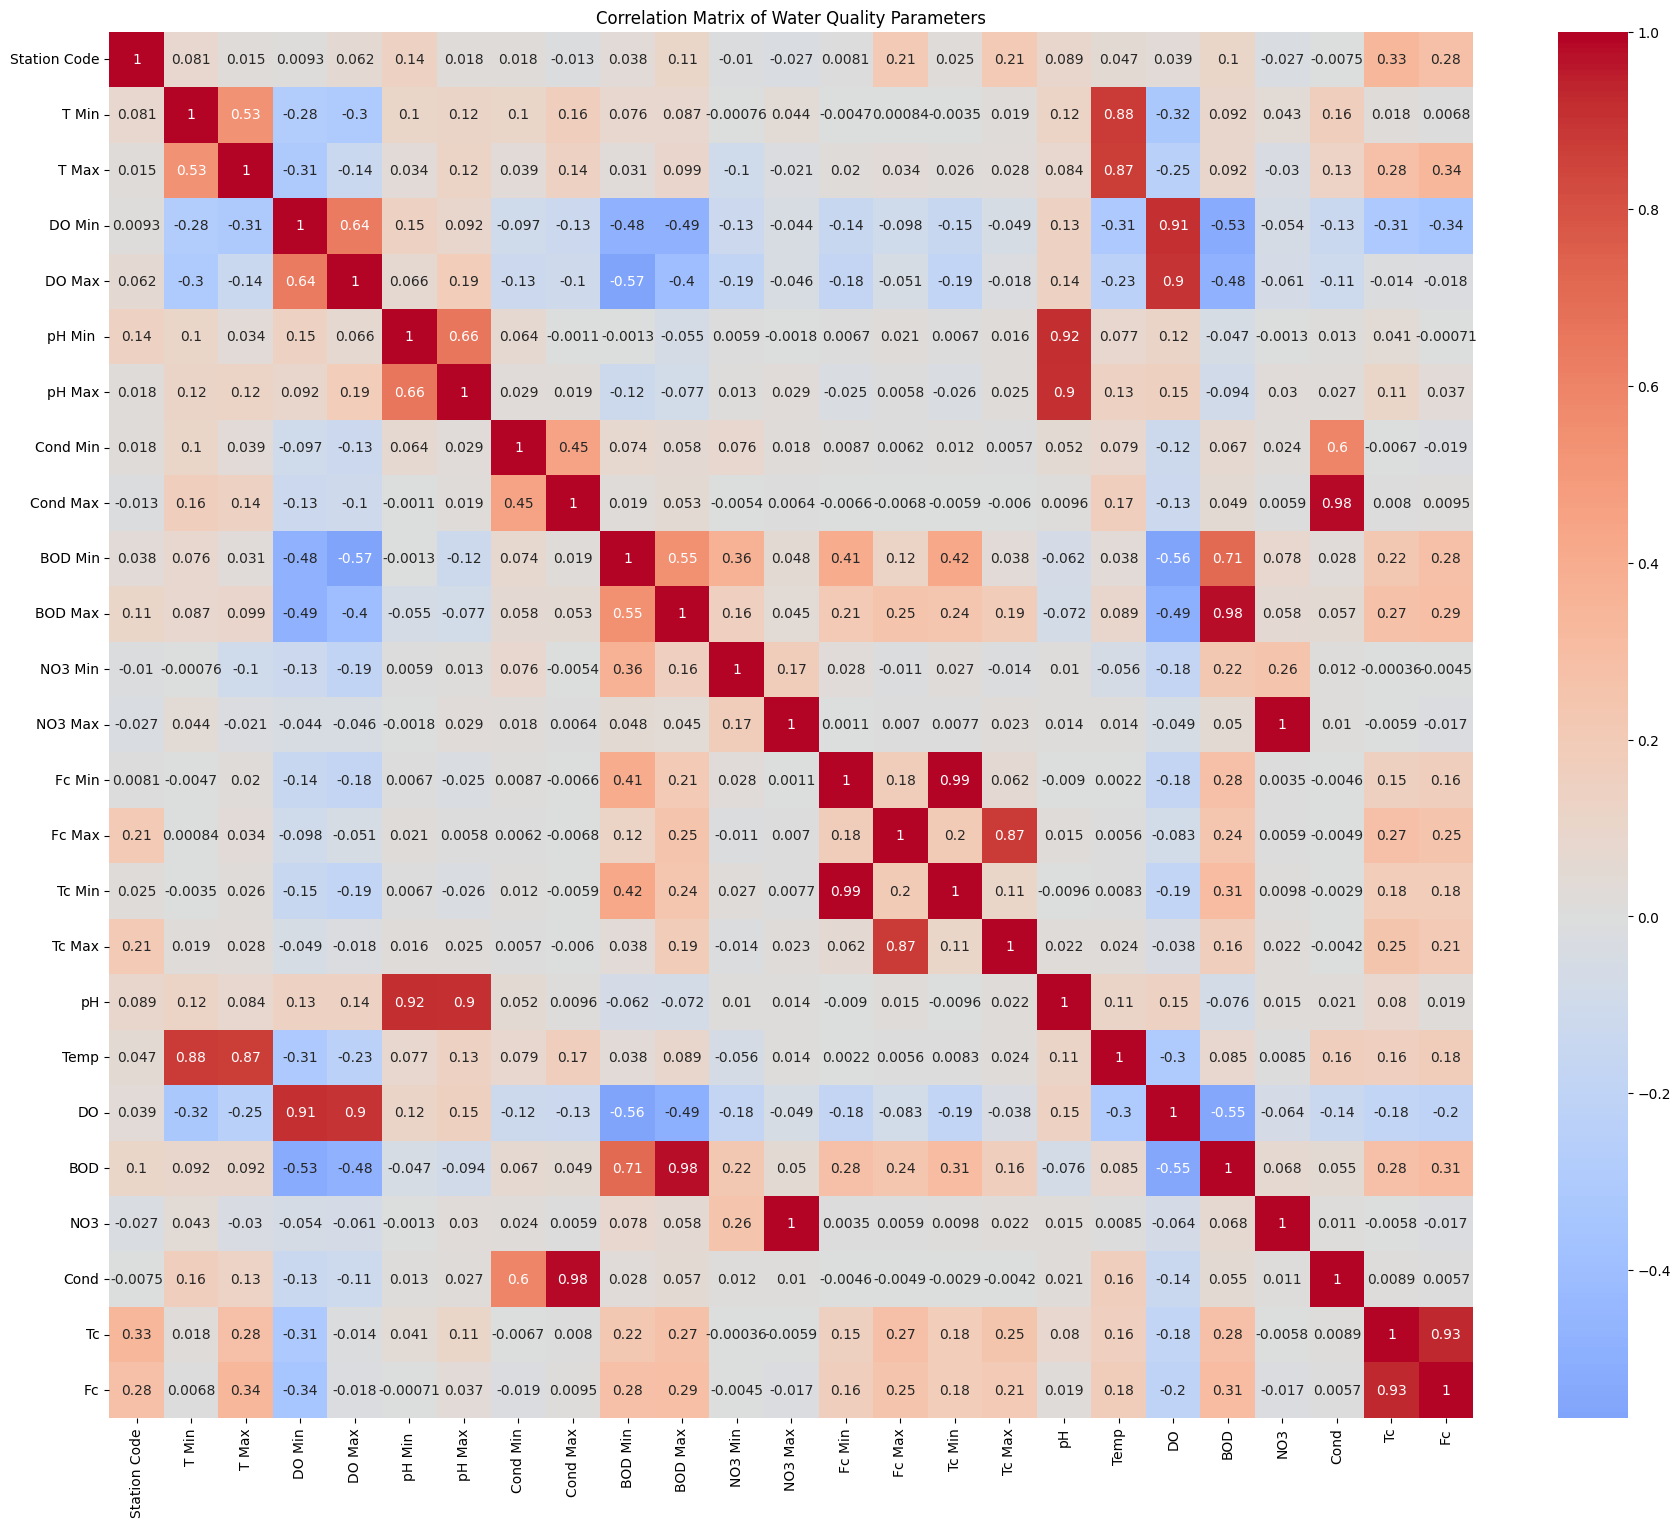


Correlation with pH:
pH              1.000000
pH Min          0.918275
pH Max          0.902872
DO              0.146804
DO Max          0.135441
DO Min          0.131538
T Min           0.120553
Temp            0.114028
Station Code    0.089248
T Max           0.083635
Tc              0.079673
Cond Min        0.051596
Tc Max          0.022358
Cond            0.021433
Fc              0.019441
NO3             0.015000
Fc Max          0.014897
NO3 Max         0.014290
NO3 Min         0.009990
Cond Max        0.009594
Fc Min         -0.009020
Tc Min         -0.009640
BOD Min        -0.062058
BOD Max        -0.072168
BOD            -0.075994
Name: pH, dtype: float64


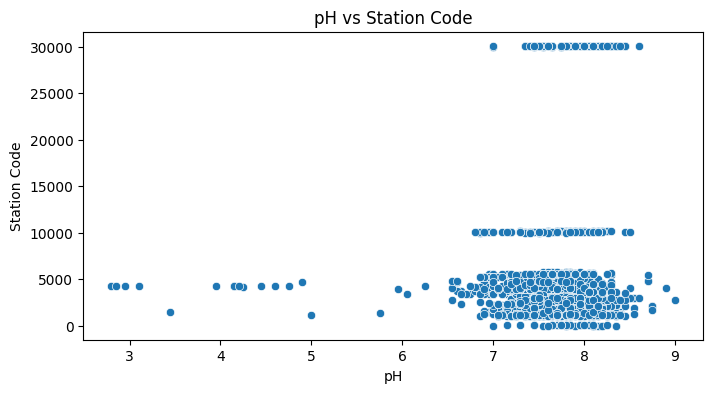

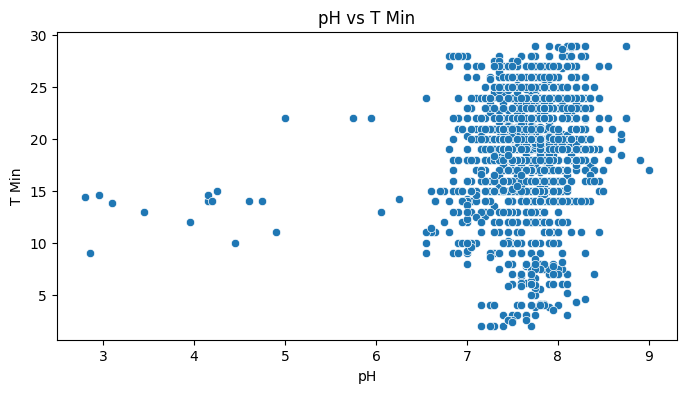

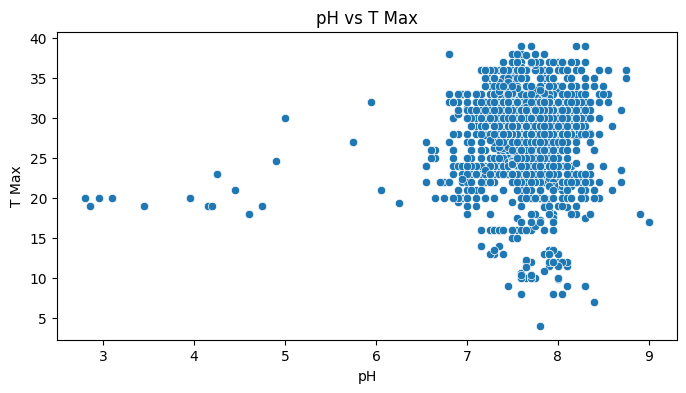

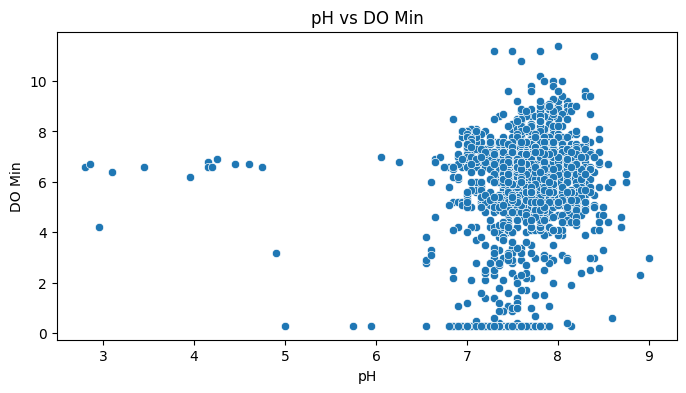

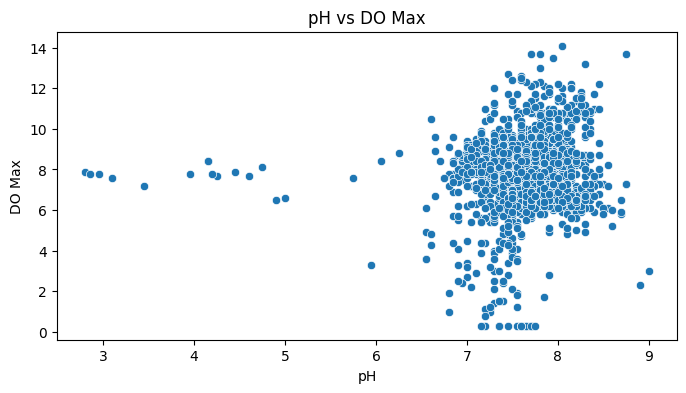

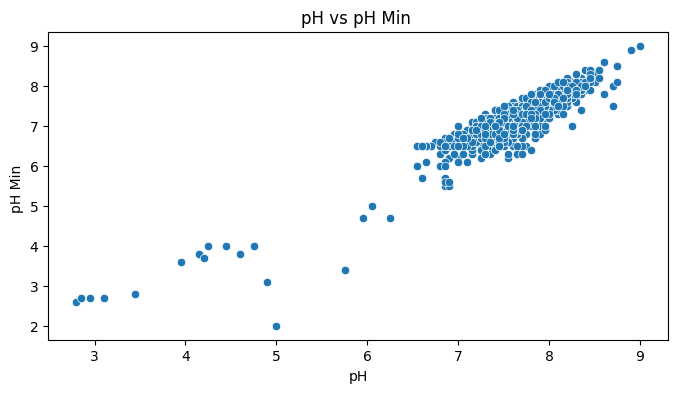

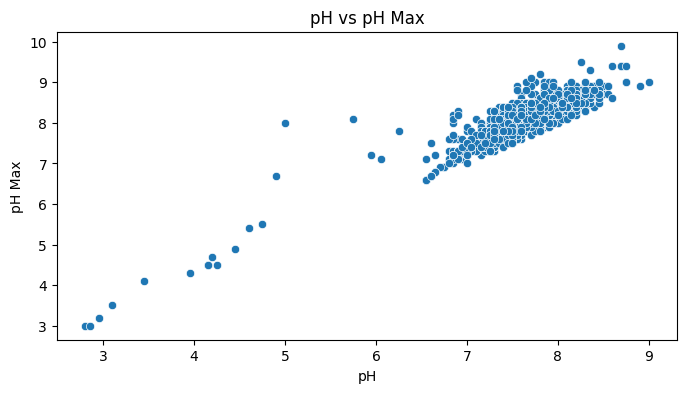

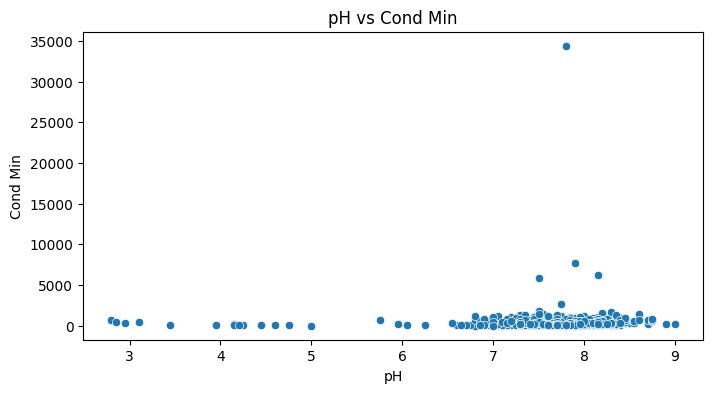

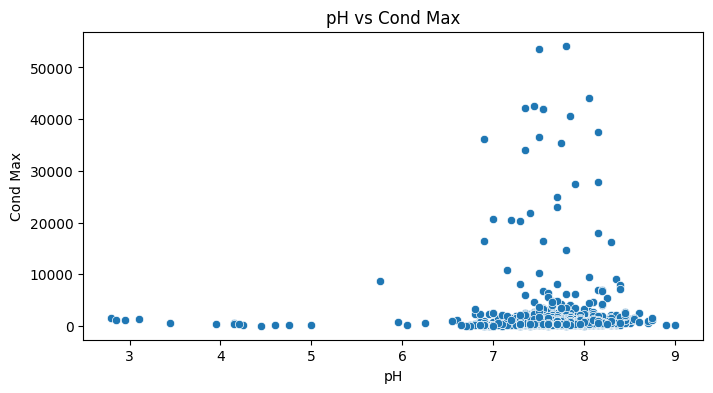

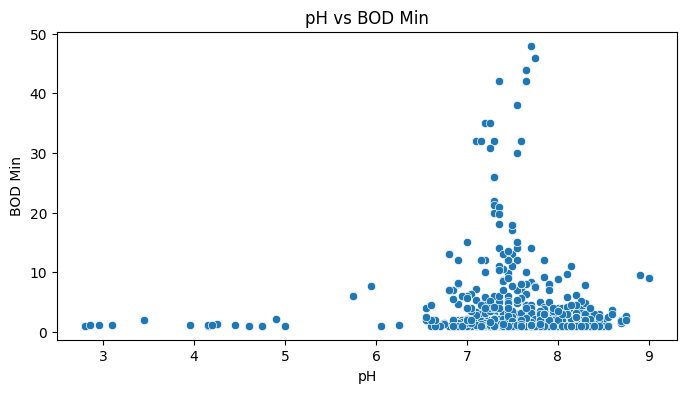

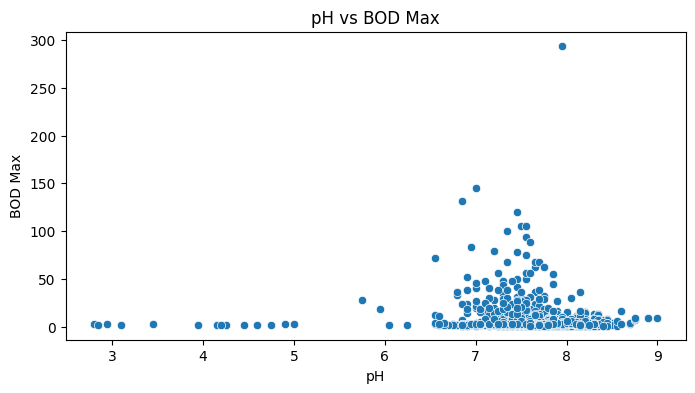

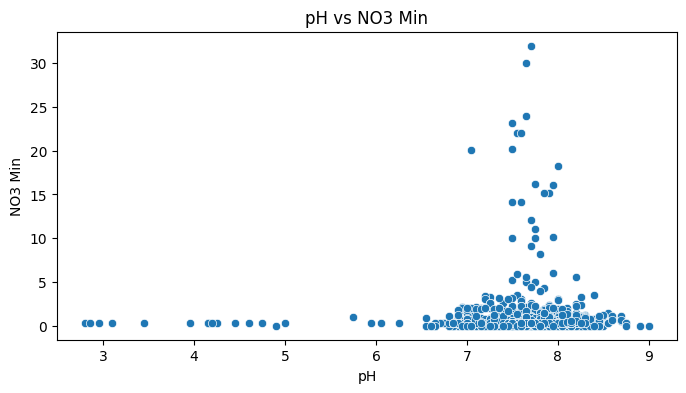

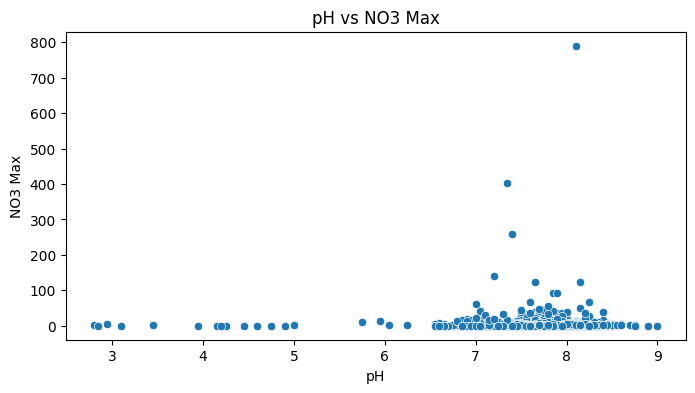

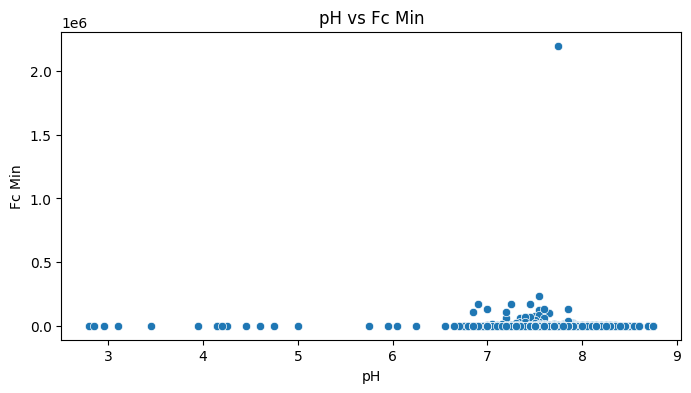

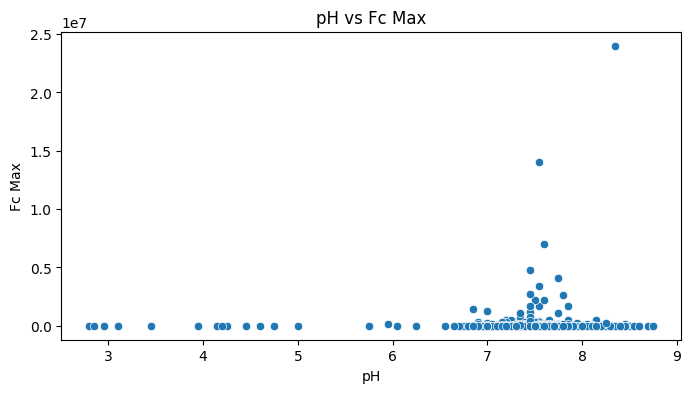

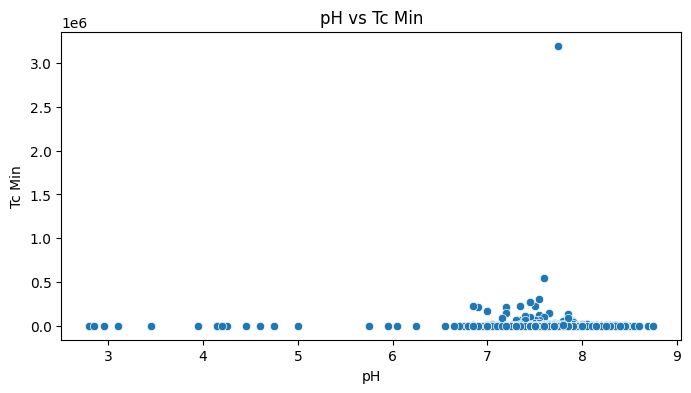

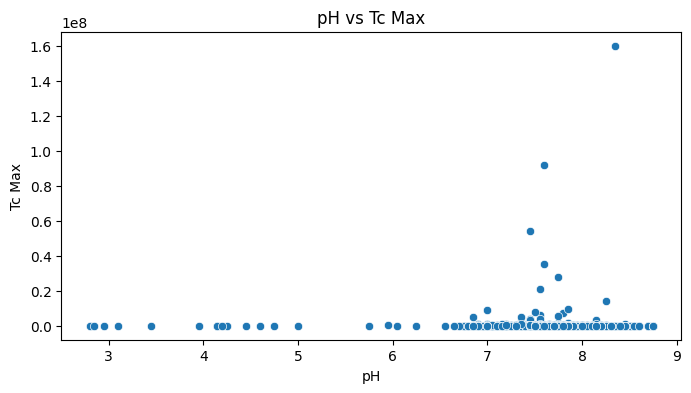

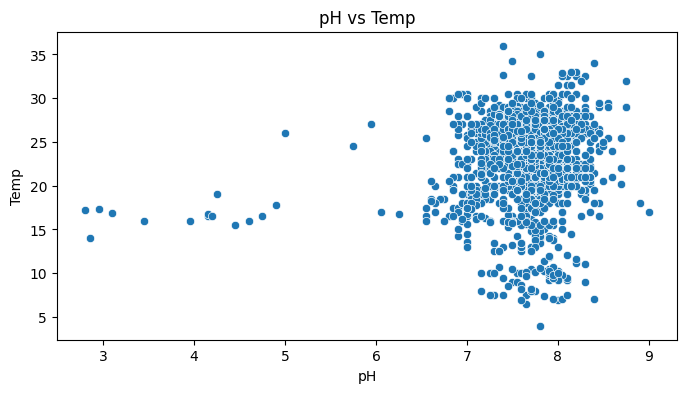

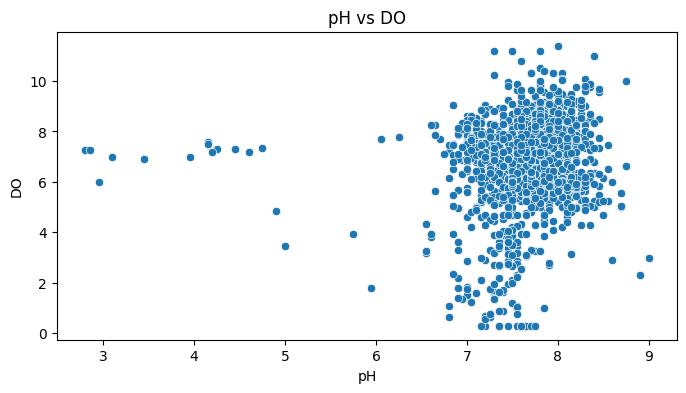

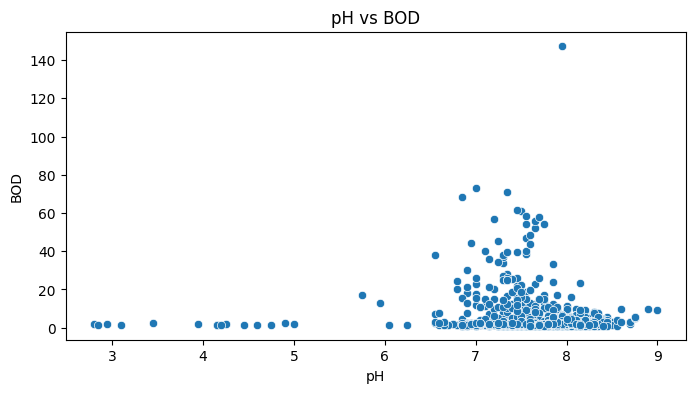

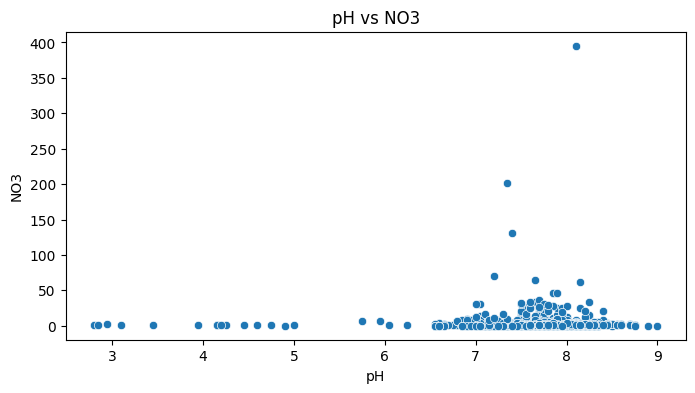

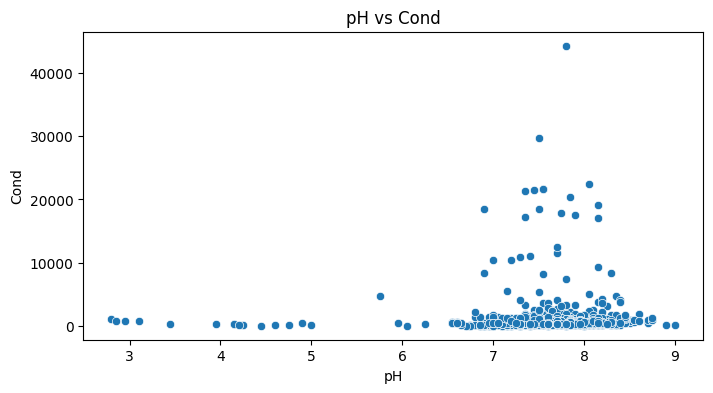

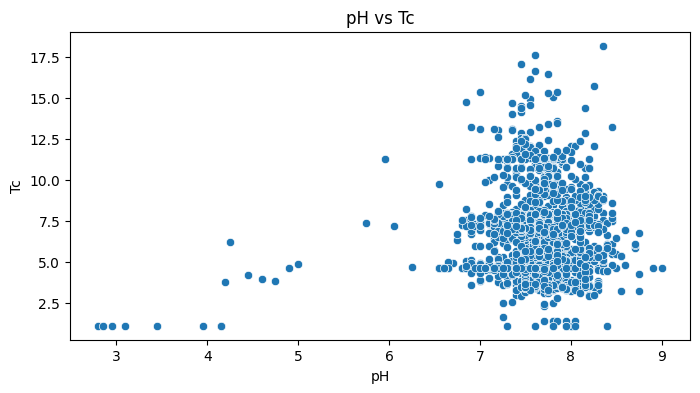

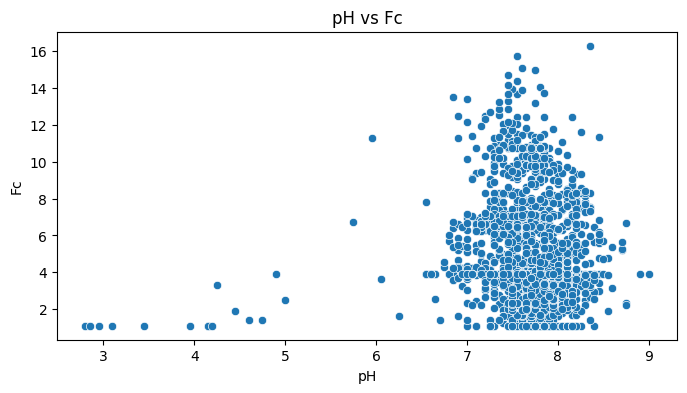


=== Training Random Forest ===
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

         Bad       1.00      0.98      0.99       247
        Good       0.98      1.00      0.99       158

    accuracy                           0.99       405
   macro avg       0.99      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405



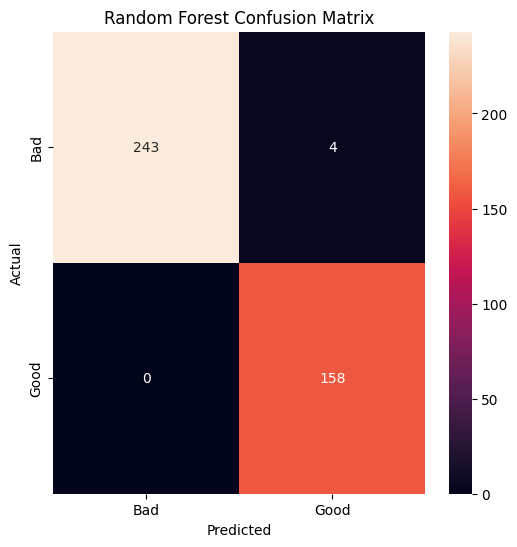


Feature Importances (Random Forest):
  Feature  Importance
7      Fc    0.327346
6      Tc    0.301191
3     BOD    0.196706
2      DO    0.049517
5    Cond    0.043859
4     NO3    0.029935
0      pH    0.027297
1    Temp    0.024149


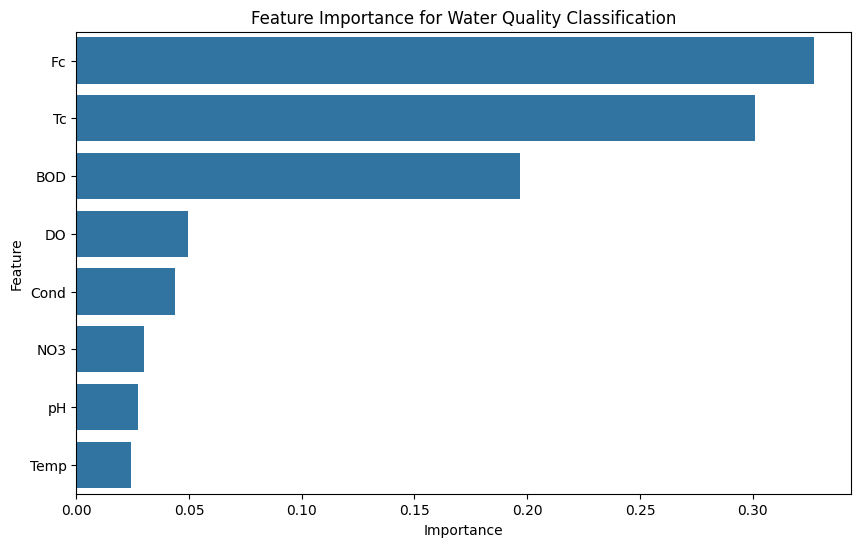

In [ ]:
# 7. Main Execution
if __name__ == "__main__":
    # Load data
    filepath = '/content/Copy of WQuality_River-Data-2023_change(1).xlsx'
    df = load_and_preprocess_data(filepath)

    if df is not None:
        # Classify water quality
        df['Water_Quality'] = df.apply(classify_water_quality, axis=1)

        # Show distribution of water quality classes
        print("\nWater Quality Distribution:")
        print(df['Water_Quality'].value_counts())

        # Analyze correlations
        analyze_correlations(df)

        # Prepare features and target
        features = ['pH', 'Temp', 'DO', 'BOD', 'NO3', 'Cond', 'Tc', 'Fc']
        X = df[features]
        y = df['Water_Quality']

        # Train and evaluate models
        results, label_encoder, scaler = train_and_evaluate_models(X, y)

        # Feature importance from Random Forest
        rf_model = results['Random Forest']['model']
        feature_importances = pd.DataFrame({
            'Feature': features,
            'Importance': rf_model.feature_importances_
        }).sort_values('Importance', ascending=False)

        print("\nFeature Importances (Random Forest):")
        print(feature_importances)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importances)
        plt.title('Feature Importance for Water Quality Classification')
        plt.show()




Water Quality Distribution:
Water_Quality
Bad     961
Good    659
Name: count, dtype: int64

=== Training Random Forest ===
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

         Bad       1.00      0.99      0.99       247
        Good       0.98      1.00      0.99       158

    accuracy                           0.99       405
   macro avg       0.99      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405



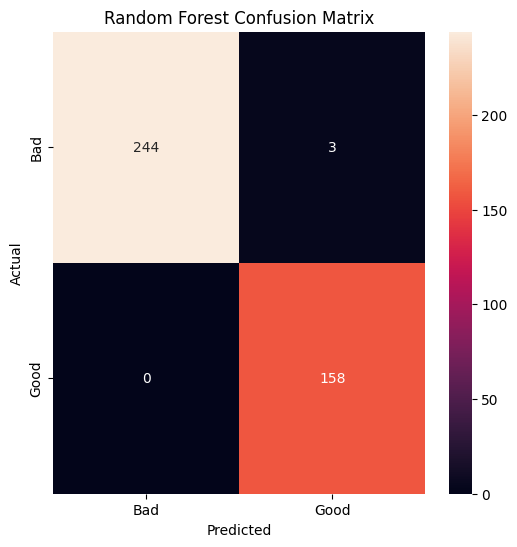

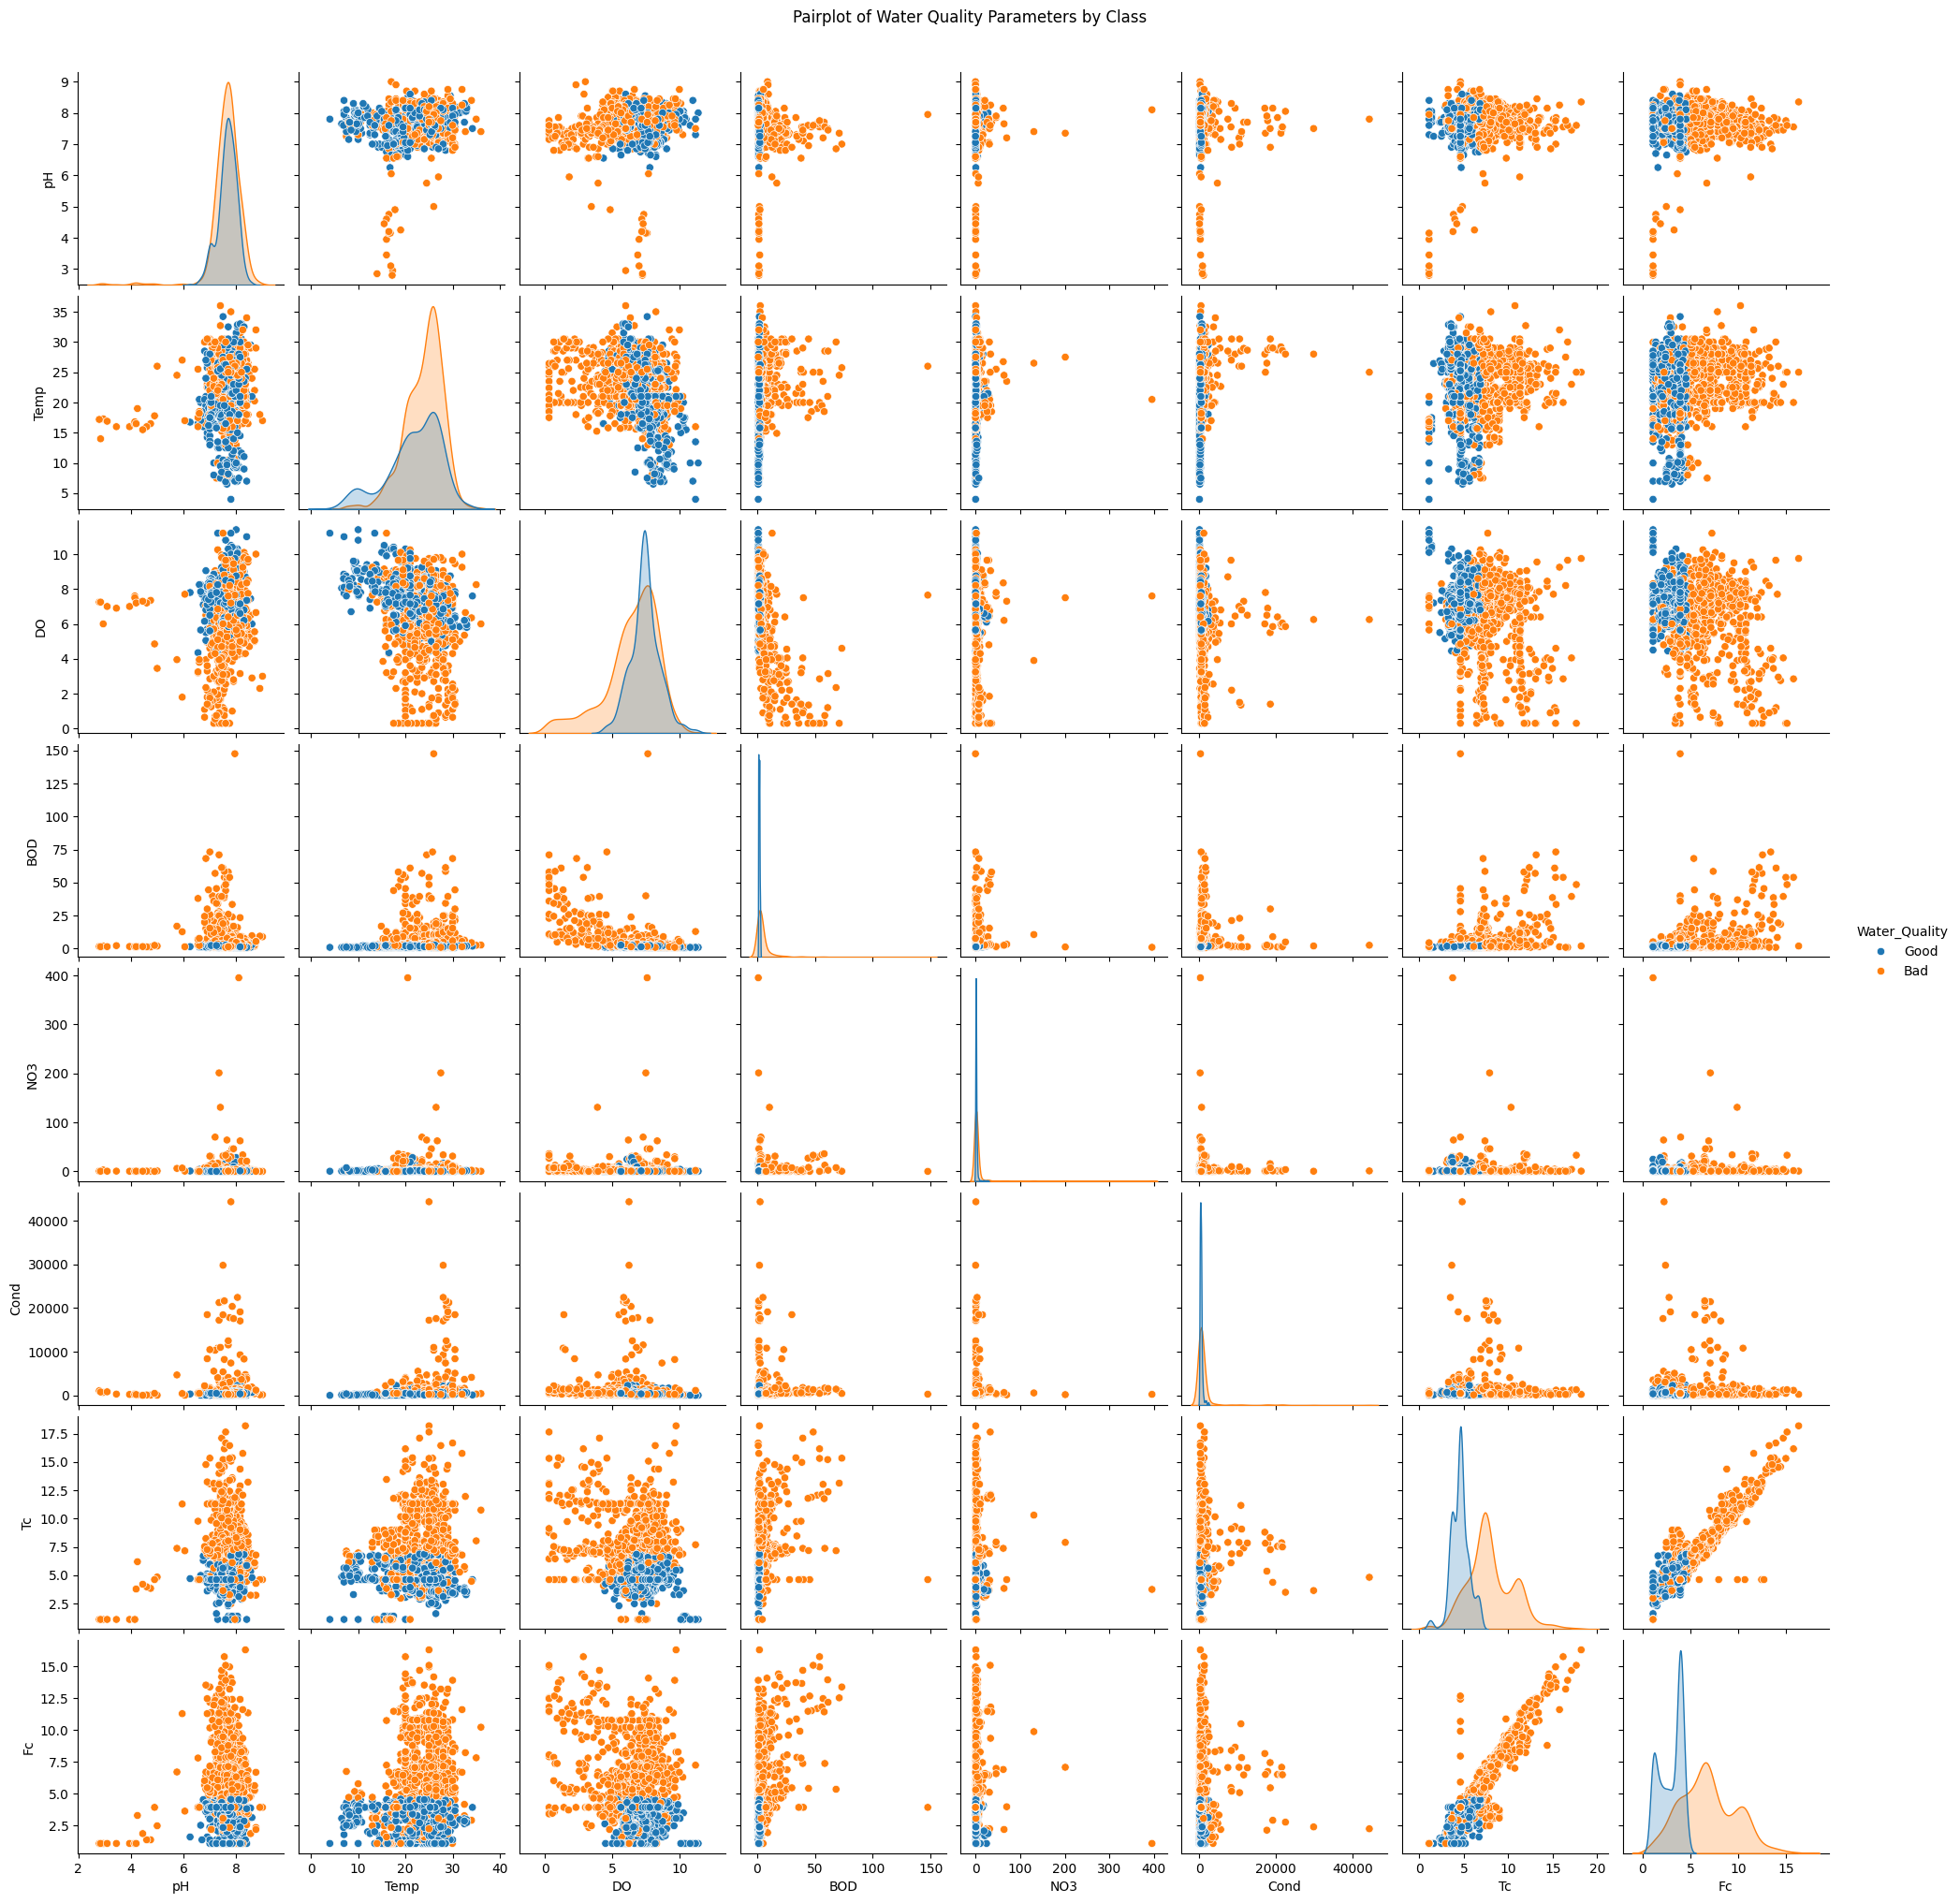

In [ ]:
# 7. Main Execution - Including necessary steps for subsequent cells
# Load data
filepath = '/content/Copy of WQuality_River-Data-2023_change(1).xlsx'
df = load_and_preprocess_data(filepath)

if df is not None:
    # Classify water quality
    df['Water_Quality'] = df.apply(classify_water_quality, axis=1)

    # Show distribution of water quality classes
    print("\nWater Quality Distribution:")
    print(df['Water_Quality'].value_counts())

    # Analyze correlations (Optional - can be run separately if needed)
    # analyze_correlations(df)

    # Prepare features and target
    features = ['pH', 'Temp', 'DO', 'BOD', 'NO3', 'Cond', 'Tc', 'Fc']
    X = df[features]
    y = df['Water_Quality']

    # Train and evaluate models - Necessary for prediction and feature importance
    results, label_encoder, scaler = train_and_evaluate_models(X, y)

    # Create a pairplot to visualize relationships between features and the target variable
    # Select the features and the target variable
    pairplot_data = df[['pH', 'Temp', 'DO', 'BOD', 'NO3', 'Cond', 'Tc', 'Fc', 'Water_Quality']]

    # Create the pairplot
    sns.pairplot(pairplot_data, hue='Water_Quality', diag_kind='kde')
    plt.suptitle('Pairplot of Water Quality Parameters by Class', y=1.02)
    plt.show()



In [ ]:
# 8. Safe Water Parameter Ranges
print("\n=== Safe Water Parameter Ranges ===")
print("""
For water to be 'Safe for Immediate Consumption':
- pH: 6.5-8.5
- Dissolved Oxygen (DO): ≥6.0 mg/L
- Biological Oxygen Demand (BOD): ≤1.0 mg/L
- Nitrate (NO3): ≤10 mg/L (WHO standard is 50 mg/L but we're stricter)
- Conductivity: ≤1000 µmho/cm
- Total Coliform (Tc): ≤10 MPN/100ml
- Fecal Coliform (Fc): 0 MPN/100ml

For 'Good' quality (suitable with conventional treatment):
- pH: 6.0-9.0
- DO: ≥4.0 mg/L
- BOD: ≤3.0 mg/L
- NO3: ≤50 mg/L
- Conductivity: ≤2500 µmho/cm
- Tc: ≤1000 MPN/100ml
- Fc: ≤100 MPN/100ml

Anything outside these ranges is classified as 'Bad'
""")


=== Safe Water Parameter Ranges ===

For water to be 'Safe for Immediate Consumption':
- pH: 6.5-8.5
- Dissolved Oxygen (DO): ≥6.0 mg/L
- Biological Oxygen Demand (BOD): ≤1.0 mg/L
- Nitrate (NO3): ≤10 mg/L (WHO standard is 50 mg/L but we're stricter)
- Conductivity: ≤1000 µmho/cm
- Total Coliform (Tc): ≤10 MPN/100ml
- Fecal Coliform (Fc): 0 MPN/100ml

For 'Good' quality (suitable with conventional treatment):
- pH: 6.0-9.0
- DO: ≥4.0 mg/L
- BOD: ≤3.0 mg/L
- NO3: ≤50 mg/L
- Conductivity: ≤2500 µmho/cm
- Tc: ≤1000 MPN/100ml
- Fc: ≤100 MPN/100ml

Anything outside these ranges is classified as 'Bad'



In [ ]:
def predict_water_quality(pH, Temp, DO, BOD, NO3, Cond, Tc, Fc, model, scaler, label_encoder):
    """
    Predicts the water quality based on input parameters using a trained model.

    Args:
        pH (float): pH level
        Temp (float): Temperature
        DO (float): Dissolved Oxygen
        BOD (float): Biological Oxygen Demand
        NO3 (float): Nitrate
        Cond (float): Conductivity
        Tc (float): Total Coliform
        Fc (float): Fecal Coliform
        model: Trained machine learning model.
        scaler: Fitted StandardScaler object.
        label_encoder: Fitted LabelEncoder object for target classes.

    Returns:
        str: Predicted water quality class ('Safe for Immediate Consumption', 'Good', or 'Bad').
    """
    # Create a DataFrame from the input parameters
    input_data = pd.DataFrame([[pH, Temp, DO, BOD, NO3, Cond, Tc, Fc]],
                              columns=['pH', 'Temp', 'DO', 'BOD', 'NO3', 'Cond', 'Tc', 'Fc'])

    # Apply the same preprocessing steps as training (log transformation for Tc and Fc)
    input_data['Tc'] = np.log1p(input_data['Tc'])
    input_data['Fc'] = np.log1p(input_data['Fc'])


    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    prediction_encoded = model.predict(input_data_scaled)

    # Decode the prediction
    prediction_class = label_encoder.inverse_transform(prediction_encoded)

    return prediction_class[0]

# Example usage (you can replace these values with your test data)
# Assuming 'results', 'label_encoder', and 'scaler' are available from the training step
# Choose a model, e.g., Random Forest
# chosen_model = results['Random Forest']['model']
#
# # Example input values (replace with actual test values)
# example_pH = 7.5
# example_Temp = 25.0
# example_DO = 6.5
# example_BOD = 1.5
# example_NO3 = 8.0
# example_Cond = 800.0
# example_Tc = 50.0 # Raw value before log transform
# example_Fc = 5.0  # Raw value before log transform
#
# predicted_quality = predict_water_quality(example_pH, example_Temp, example_DO,
#                                          example_BOD, example_NO3, example_Cond,
#                                          example_Tc, example_Fc,
#                                          chosen_model, scaler, label_encoder)
#
# print(f"\nPredicted Water Quality: {predicted_quality}")

In [ ]:
# Get input from the user
print("Please enter the following water quality parameters:")

try:
    input_pH = float(input("Enter pH level: "))
    input_Temp = float(input("Enter Temperature: "))
    input_DO = float(input("Enter Dissolved Oxygen (DO): "))
    input_BOD = float(input("Enter Biological Oxygen Demand (BOD): "))
    input_NO3 = float(input("Enter Nitrate (NO3): "))
    input_Cond = float(input("Enter Conductivity: "))
    input_Tc = float(input("Enter Total Coliform (Tc): "))
    input_Fc = float(input("Enter Fecal Coliform (Fc): "))

    # Assuming the main execution cell (cnw0Ymub5hbH) has been run
    # and 'results', 'scaler', and 'label_encoder' are available
    # Choose the model you want to use for prediction (e.g., Random Forest)
    if 'results' in locals() and 'Random Forest' in results:
        chosen_model = results['Random Forest']['model']

        # Make the prediction
        predicted_quality = predict_water_quality(input_pH, input_Temp, input_DO,
                                                 input_BOD, input_NO3, input_Cond,
                                                 input_Tc, input_Fc,
                                                 chosen_model, scaler, label_encoder)

        print(f"\n--- Prediction Result ---")
        print(f"Based on the input parameters, the predicted water quality is: {predicted_quality}")
        print("-----------------------")

    else:
        print("\nError: Model or necessary variables not found.")
        print("Please ensure you have run the main execution cell (cell id cnw0Ymub5hbH) first.")

except ValueError:
    print("\nInvalid input. Please enter numerical values for all parameters.")
except Exception as e:
    print(f"\nAn error occurred during prediction: {e}")

Please enter the following water quality parameters:
Enter pH level: 7.5
Enter Temperature: 25
Enter Dissolved Oxygen (DO): 6
Enter Biological Oxygen Demand (BOD): 1.5
Enter Nitrate (NO3): 8.5
Enter Conductivity: 800
Enter Total Coliform (Tc): 50
Enter Fecal Coliform (Fc): 5

--- Prediction Result ---
Based on the input parameters, the predicted water quality is: Good
-----------------------
